## Monte Carlo / $\chi^2$

### Ecercise 1

$ f(x; \alpha, \beta) = 1 + \alpha x + \beta x^2 $

For $\alpha = \beta = 0.5$ generate 2000 Monte Carlo data points using the above function transformed into a PDF over the range $-0.95 \leq x \leq 0.95$. 

Normalization:

In [24]:
import numpy as np
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Modules to see files and folders in directories
from scipy import stats
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12

A = 0.457  # Normalization constant
xmin, xmax = -0.95, 0.95

def f(x):
    return (1+0.5*x+0.5*x**2)*A

# Inversion not possible... Use accept/reject method

In [3]:
sys.path.append('C:\\Users\\Bruger\\AppStat2021\\External_Functions')
import Clotilde_external_functions as cef
import ExternalFunctions as ef

In [4]:
r = np.random
r.seed(42)

N_points = 10000
    
def smartfunc(x):
    return np.exp(x/2)       # Smart box (all numbers should be smaller than the box.)

x = np.linspace(xmin, xmax, 1000)
ymax = np.max(f(x))

v1 = np.zeros(N_points)
cn = 0                 # count number

while cn < N_points:
    r1 = r.uniform(0,10)
    x1 = 2*np.log(r1)                        
    y1 = r.random()*smartfunc(x1)
    if (y1 < f(x1)):        
        v1[cn] = x1
        cn+=1
        
eff = N_points / cn                        # Efficiency of generating points (fraction accepted)
eff_error = np.sqrt(eff * (1-eff) / cn)    # Error on efficiency (binomial)
integral =  eff * (xmax-xmin) * ymax               # Integral
integral_error = eff_error * (xmax-xmin) * ymax 
N_bins = 50
k = (xmax-xmin) / N_bins
N = N_points * k

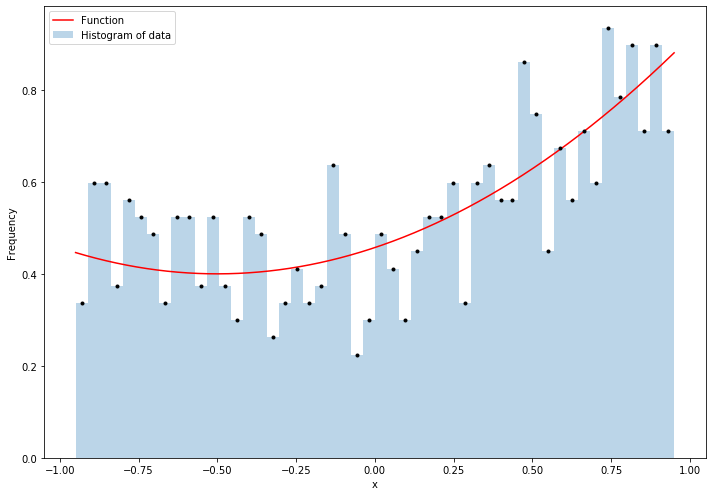

In [56]:
def plot(x) :
    k = (xmax-xmin) / N_bins
    N = N_points * k
    return N * 1.0/integral * f(x)     # Normalize the function by adding a factor 1.0/integral


fig, ax = plt.subplots(figsize=(10, 7))
x_hist, y_hist, sy, binwidth = cef.make_hist(ax, v1, N_bins, density = True, xrange=(xmin, xmax), errors = False,  
                                                   label=('Histogram of data', ''), dic = False)
#ax.hist(v1, bins=50, range=(xmin, xmax), histtype='step', label='Histogram', density = True)
ax.set(xlabel="x", ylabel="Frequency", xlim=(xmin-0.1, xmax+0.1))

# Plot f(x)
ax.plot(x, f(x), 'r-', label='Function')
#ax.plot(x, smartfunc(x))

# Add legend
ax.legend(loc='best')
fig.tight_layout()

#### Fit the MLE parameters using a minimizer/maximizer.

Repeat 100 to 500 times plotting the distributions of the fitted parameters aswell as $\alpha$ vs. $\beta$.

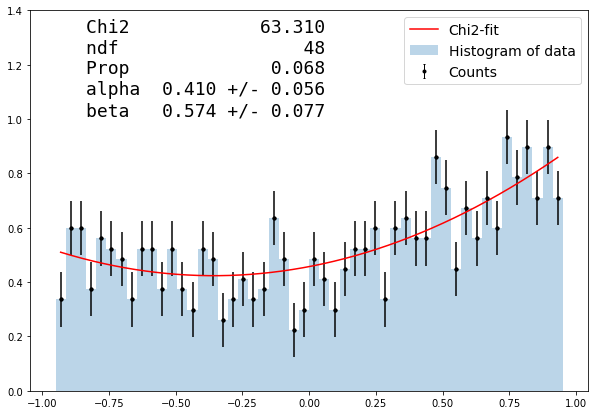

In [55]:
# Chi^2 fit

def fit_func(x, alpha, beta):
    return (1+ alpha*x + beta*x**2)*A

def plot_func(x, alpha, beta):
    return fit_func(x, alpha, beta)*binwidth

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_ylim(0, 1.4)
yerr = np.ones_like(y_hist)*0.1
#cef.UnbinnedLH_plot(ax, fit_func, plot_func, v1, xmin, xmax, [0.5, 0.5], 50, label='Data', density = True)
x_hist, y_hist, sy, binwidth = cef.make_hist(ax, v1, N_bins, density = True, xrange=(xmin, xmax), errors = False,  
                                                   label=('Histogram of data', 'Counts'), dic = False)
cef.chi_squared_plot(ax, fit_func, x_hist, y_hist, yerr, ['alpha', 'beta'], [0.5, 0.5], label = '', 
                     loc_dic = (0.1, 0.98), dic = True, color='-r', plot=True);

In [ ]:
# LLH-fit



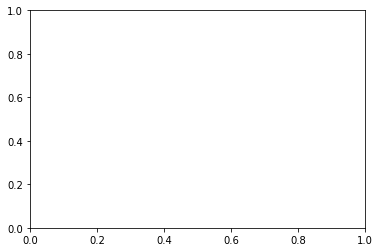

In [10]:
fig, ax = plt.subplots();

In [9]:
N_fits = 500
alpha_fit = np.zeros(N_fits)
beta_fit = np.zeros(N_fits)
Nbins_fit = 30


for i in range(N_fits):
    v1 = np.zeros(N_points)
    cn = 0                 # count number

    while cn < N_points:
        r1 = r.uniform(0,10)
        x1 = 2*np.log(r1)                        
        y1 = r.random()*smartfunc(x1)
        if (y1 < f(x1)):        
            v1[cn] = x1
            cn+=1
            
    x_hist_fit, y_hist_fit, sy, binwidth_fit = cef.make_hist(ax, v1, Nbins_fit, density = True, 
                                                             xrange=(xmin, xmax), plot = False)
    yerr_fit = np.ones_like(y_hist_fit)*0.1
    
    Chi2_fit, Prob_fit, val, err = \
    cef.chi_squared_plot(ax, fit_func, x_hist_fit, y_hist_fit, yerr_fit, ['alpha', 'beta'], [0.5, 0.5], plot = False);
    alpha_fit[i] = val[0]
    beta_fit[i] = val[1]

(0, 65)

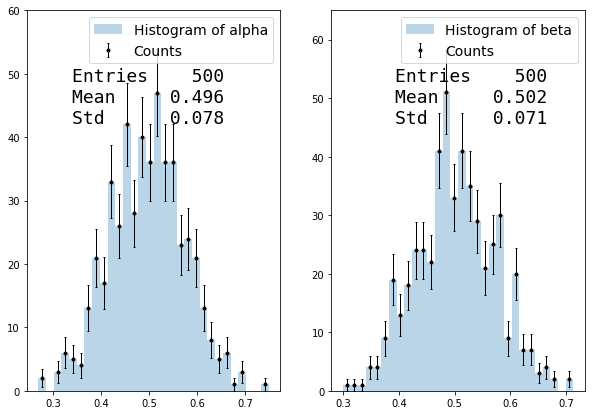

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
ax.ravel()

alpha_histx, alpha_histy, salpha, binwidth_alpha = cef.make_hist(ax[0], alpha_fit, Nbins_fit, errors = True,  
                                                   label=('Histogram of alpha', 'Counts'), dic = True, loc_dic = (0.18, 0.85))
beta_histx, beta_histy, sbeta, binwidth_beta = cef.make_hist(ax[1], beta_fit, Nbins_fit, errors = True,  
                                                   label=('Histogram of beta', 'Counts'), dic = True, loc_dic = (0.25, 0.85))
ax[0].set_ylim(0, 60)
ax[1].set_ylim(0,65)

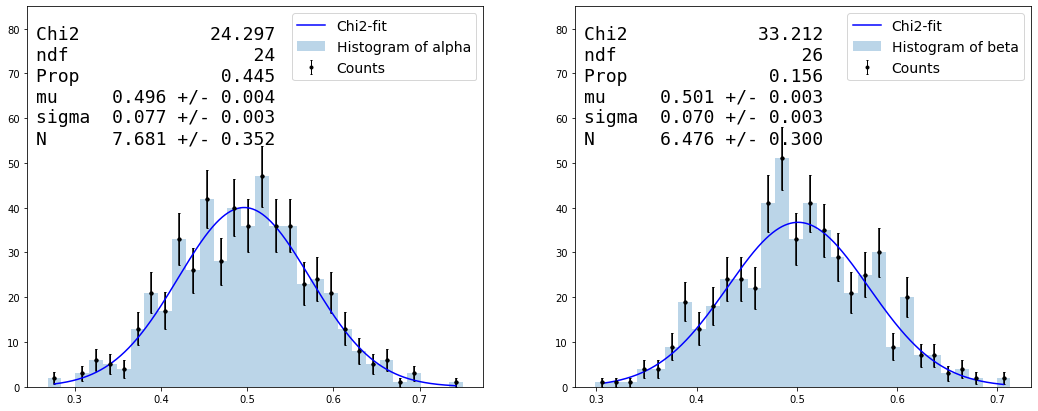

In [30]:
# Gauss fit

def func_gauss(x, mu, sigma, N):
    return N*stats.norm.pdf(x, mu, sigma)

fig, ax = plt.subplots(1, 2, figsize = (18,7))
alpha_histx, alpha_histy, salpha, binwidth_alpha = cef.make_hist(ax[0], alpha_fit, Nbins_fit, errors = True,  
                                                   label=('Histogram of alpha', 'Counts'), dic = False, loc_dic = (0.18, 0.85))
beta_histx, beta_histy, sbeta, binwidth_beta = cef.make_hist(ax[1], beta_fit, Nbins_fit, errors = True,  
                                                   label=('Histogram of beta', 'Counts'), dic = False, loc_dic = (0.25, 0.85))

Chi2_alpha, Prob_alpha, vals_alpha, errs_alpha = cef.chi_squared_plot(ax[0], func_gauss, alpha_histx, alpha_histy, salpha, ['mu', 'sigma', 'N'], 
                     [0.5, 0.088, 100], label='', loc_dic=(0.02, 0.95), color='-b')
Chi2_beta, Prob_beta, vals_beta, errs_beta = cef.chi_squared_plot(ax[1], func_gauss, beta_histx, beta_histy, sbeta, ['mu', 'sigma', 'N'], 
                     [0.5, 0.088, 100], label='', loc_dic=(0.02, 0.95), color='-b');

ax[0].set_ylim(0, 85)
ax[1].set_ylim(0,85);

''

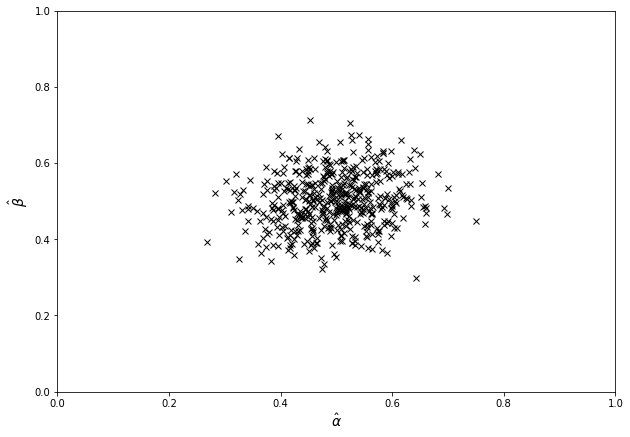

In [29]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(alpha_fit, beta_fit, 'kx')
ax.set_ylim(0,1)
ax.set_xlim(0,1)
ax.set_xlabel(r'$\hat{\alpha}$', fontsize=14)
ax.set_ylabel(r'$\hat{\beta}$', fontsize=14)
;

In [41]:
# Exercise 1b
#1 sigma confidence intervals
mu_alpha, sigma_alpha, N_alpha = vals_alpha
mu_beta, sigma_beta, N_beta = vals_beta
print(r'confidence interval alpha:', np.round(mu_alpha,3), '+/-', np.round(sigma_alpha,3))
print(r'confidence interval beta:', np.round(mu_beta,3), '+/-', np.round(sigma_beta,3))

confidence interval alpha: 0.496 +/- 0.077
confidence interval beta: 0.501 +/- 0.07


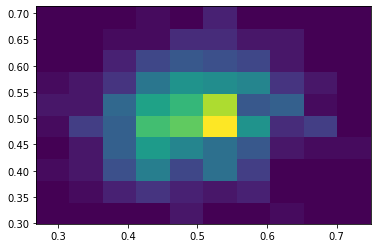

In [52]:
# With bootstrapping... What is that?
plt.hist2d(alpha_fit, beta_fit);

Which parts are the most important? 

LLH-fit, confidence intervals, bootstrapping?

## Splines

### Exercise 1

In [58]:
from scipy import interpolate, integrate

In [50]:
dust_logger = np.genfromtxt('dust_logger.txt')
depth = dust_logger[:,0]
dust_logger_val = dust_logger[:,1]

skip_knots = 10

int_lin = interpolate.interp1d(depth[::skip_knots], dust_logger_val[::skip_knots], fill_value="extrapolate")
int_cubic = interpolate.interp1d(depth[::skip_knots], dust_logger_val[::skip_knots], kind= 'cubic', fill_value="extrapolate")

x_int = np.arange(depth[0], depth[-1], 1)

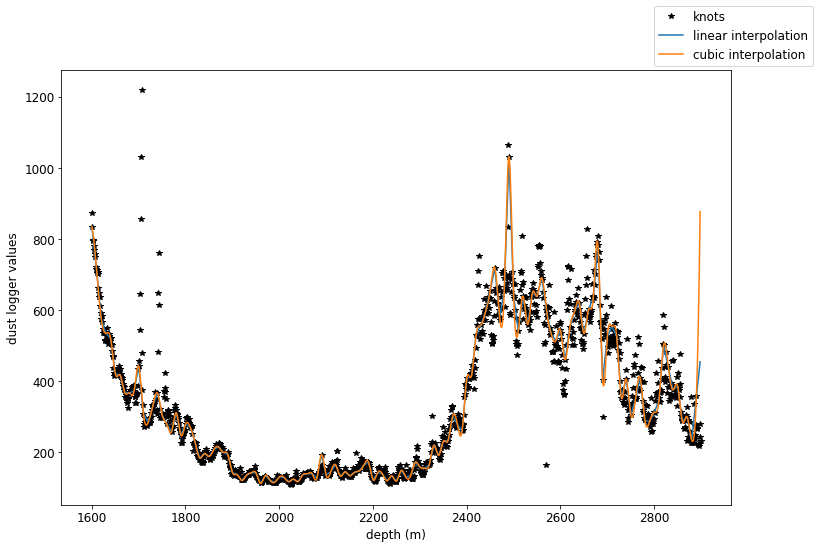

In [49]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_xlabel('depth (m)')
ax.set_ylabel('dust logger values')
ax.plot(depth, dust_logger_val, 'k*', label = 'knots')
ax.plot(x_int, int_lin(x_int), label = 'linear interpolation')
#ax.set_xlim(2600,2900)
ax.plot(x_int, int_cubic(x_int), label = 'cubic interpolation')
fig.legend(fontsize=12)

#### Exercise 2

In [74]:
SplineCubic = np.genfromtxt('SplineCubic.txt')
x_sc = SplineCubic[:,0]
y_sc = SplineCubic[:,1]

interp_lin_sc = interpolate.interp1d(x_sc, y_sc, fill_value="extrapolate")
interp_cubic_sc = interpolate.interp1d(x_sc, y_sc, kind= 'cubic', fill_value="extrapolate")
interp_quad_sc = interpolate.interp1d(x_sc, y_sc, kind= 'quadratic', fill_value="extrapolate")

x_interp_sc = np.arange(x_sc[0], x_sc[-1], 0.001)

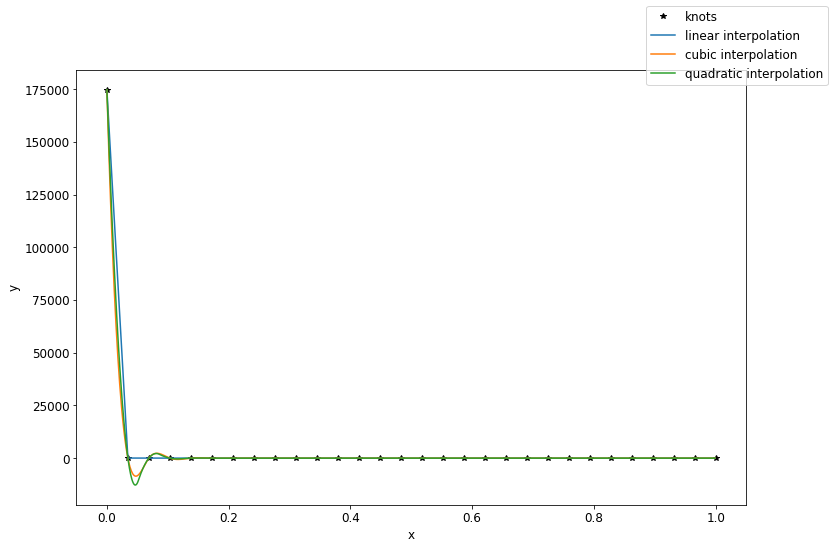

In [75]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(x_sc, y_sc, 'k*', label = 'knots')
ax.plot(x_interp_sc, interp_lin_sc(x_interp_sc), label = 'linear interpolation')
ax.plot(x_interp_sc, interp_cubic_sc(x_interp_sc), label = 'cubic interpolation')
ax.plot(x_interp_sc, interp_quad_sc(x_interp_sc), label = 'quadratic interpolation')
fig.legend(fontsize=12)

In [76]:
# Integral
x_start = 10**(-5)
x_stop = 0.01

integral_lin = integrate.quad(interp_lin_sc, x_start, x_stop)
integral_cubic = integrate.quad(interp_cubic_sc, x_start, x_stop)
integral_quad = integrate.quad(interp_quad_sc, x_start, x_stop)

print(integral_lin, integral_cubic, integral_quad)

(1493.3982827723833, 1.65800515846957e-11) (1313.2548778155267, 1.4580058025520943e-11) (1373.8929579683593, 1.525327595306835e-11)


In [79]:
def z_test(x1, x2):
    diff = x1[0] - x2[0]
    z = diff/np.sqrt(x1[1]**2 + x2[1]**2)
    return z

print(z_test(integral_lin, integral_cubic), z_test(integral_lin, integral_quad), z_test(integral_quad, integral_cubic))

8159088757709.798 5304486300545.064 2873744164789.366


In [81]:
x_start_new = 0.03
x_stop_new = 0.1

integral_lin_new = integrate.quad(interp_lin_sc, x_start_new, x_stop_new)
integral_cubic_new = integrate.quad(interp_cubic_sc, x_start_new, x_stop_new)
integral_quad_new = integrate.quad(interp_quad_sc, x_start_new, x_stop_new)

print(integral_lin_new, integral_cubic_new, integral_quad_new)
print(z_test(integral_lin, integral_cubic), z_test(integral_lin, integral_quad), z_test(integral_quad, integral_cubic))

(53.42664904677584, 2.6127985538861456e-08) (-115.92359623900562, 1.1835881335468704e-07) (-176.23780365380253, 1.2379471010567416e-06)
8159088757709.798 5304486300545.064 2873744164789.366
